In [202]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from sklearn.svm import OneClassSVM
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from pyod.models.deep_svdd import DeepSVDD
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from pyod.utils.utility import standardizer

Ex1

In [55]:
x_train, x_test, y_train, y_test = generate_data(n_train=300, n_test=200, n_features=3, contamination=0.15)

In [57]:
model = OCSVM(kernel = 'linear', contamination = 0.15) 
model.fit(x_train)

OCSVM(cache_size=200, coef0=0.0, contamination=0.15, degree=3, gamma='auto',
   kernel='linear', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [59]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

BA = balanced_accuracy_score(y_test, y_test_pred)
ROC = roc_auc_score(y_test, y_test_pred)

print(BA)
print(ROC)

0.9833333333333334
0.9833333333333334


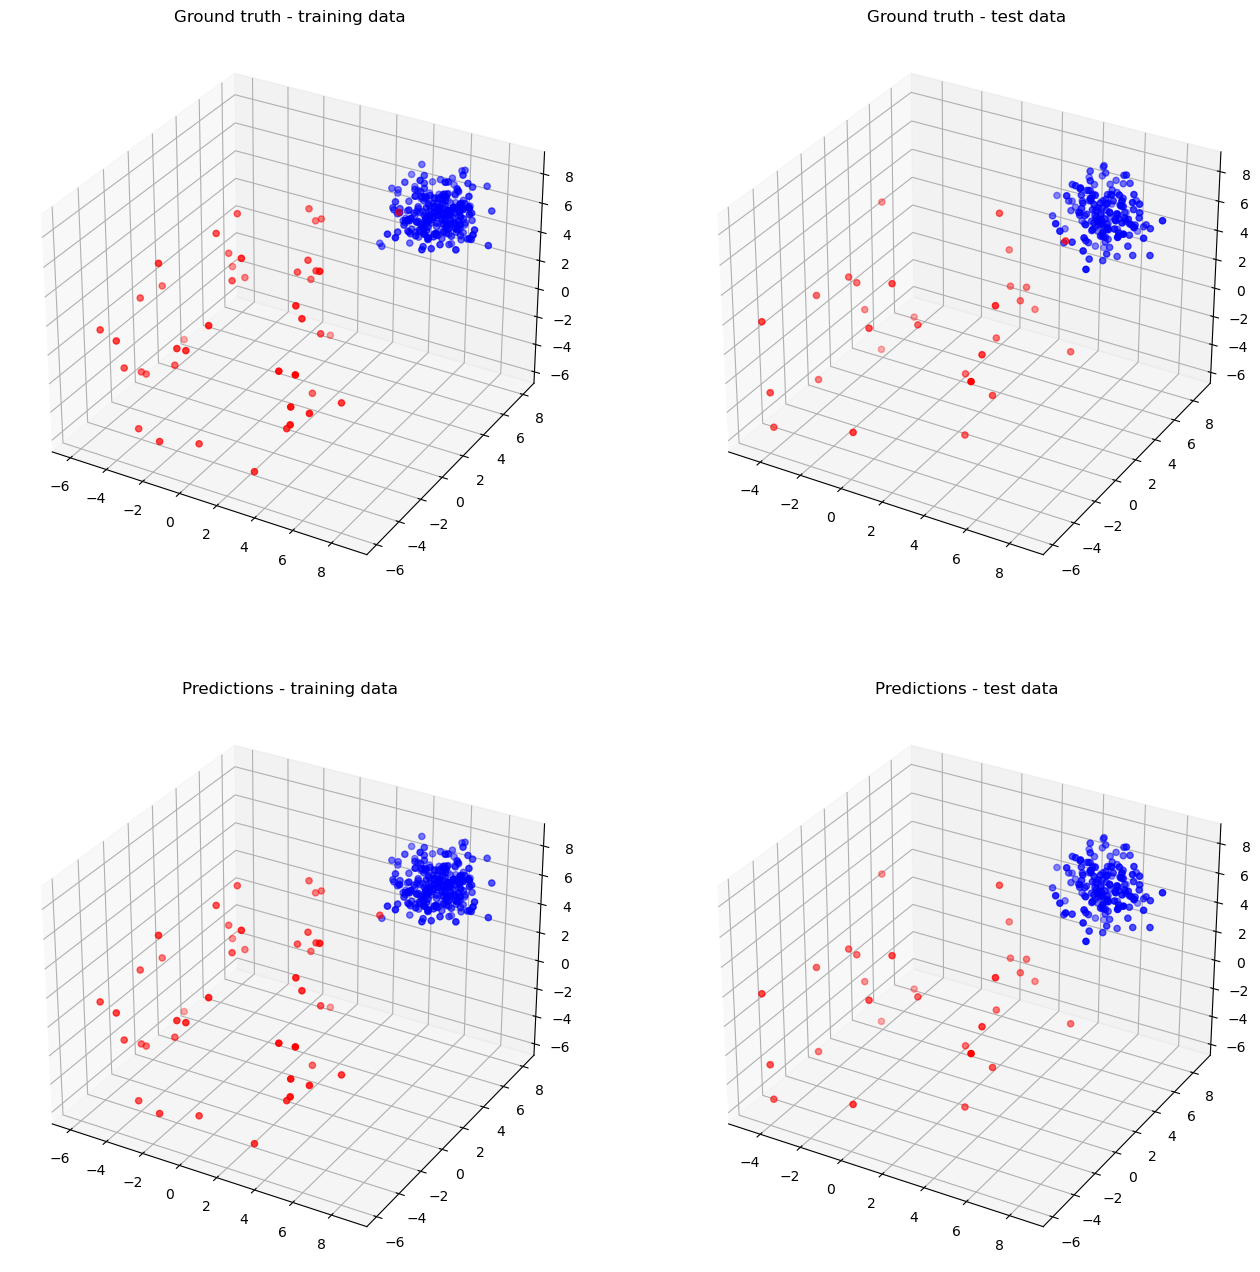

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(16,16), subplot_kw={'projection': '3d'})
ax1, ax2, ax3, ax4 = axes.ravel()

ax1.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], x_train[y_train == 0, 2], c='b')
ax1.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], x_train[y_train == 1, 2], c='r')
ax1.set_title("Ground truth - training data")

ax2.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], x_test[y_test == 0, 2], c='b')
ax2.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], x_test[y_test == 1, 2], c='r')
ax2.set_title("Ground truth - test data")

ax3.scatter(x_train[y_train_pred == 0, 0], x_train[y_train_pred == 0, 1], x_train[y_train_pred == 0, 2], c='b')
ax3.scatter(x_train[y_train_pred == 1, 0], x_train[y_train_pred == 1, 1], x_train[y_train_pred == 1, 2], c='r')
ax3.set_title("Predictions - training data")

ax4.scatter(x_test[y_test_pred == 0, 0], x_test[y_test_pred == 0, 1], x_test[y_test_pred == 0, 2], c='b')
ax4.scatter(x_test[y_test_pred == 1, 0], x_test[y_test_pred == 1, 1], x_test[y_test_pred == 1, 2], c='r')
ax4.set_title("Predictions - test data")

plt.show()

In [65]:
model = OCSVM(kernel = 'rbf', contamination = 0.15) 
model.fit(x_train)

OCSVM(cache_size=200, coef0=0.0, contamination=0.15, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [67]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

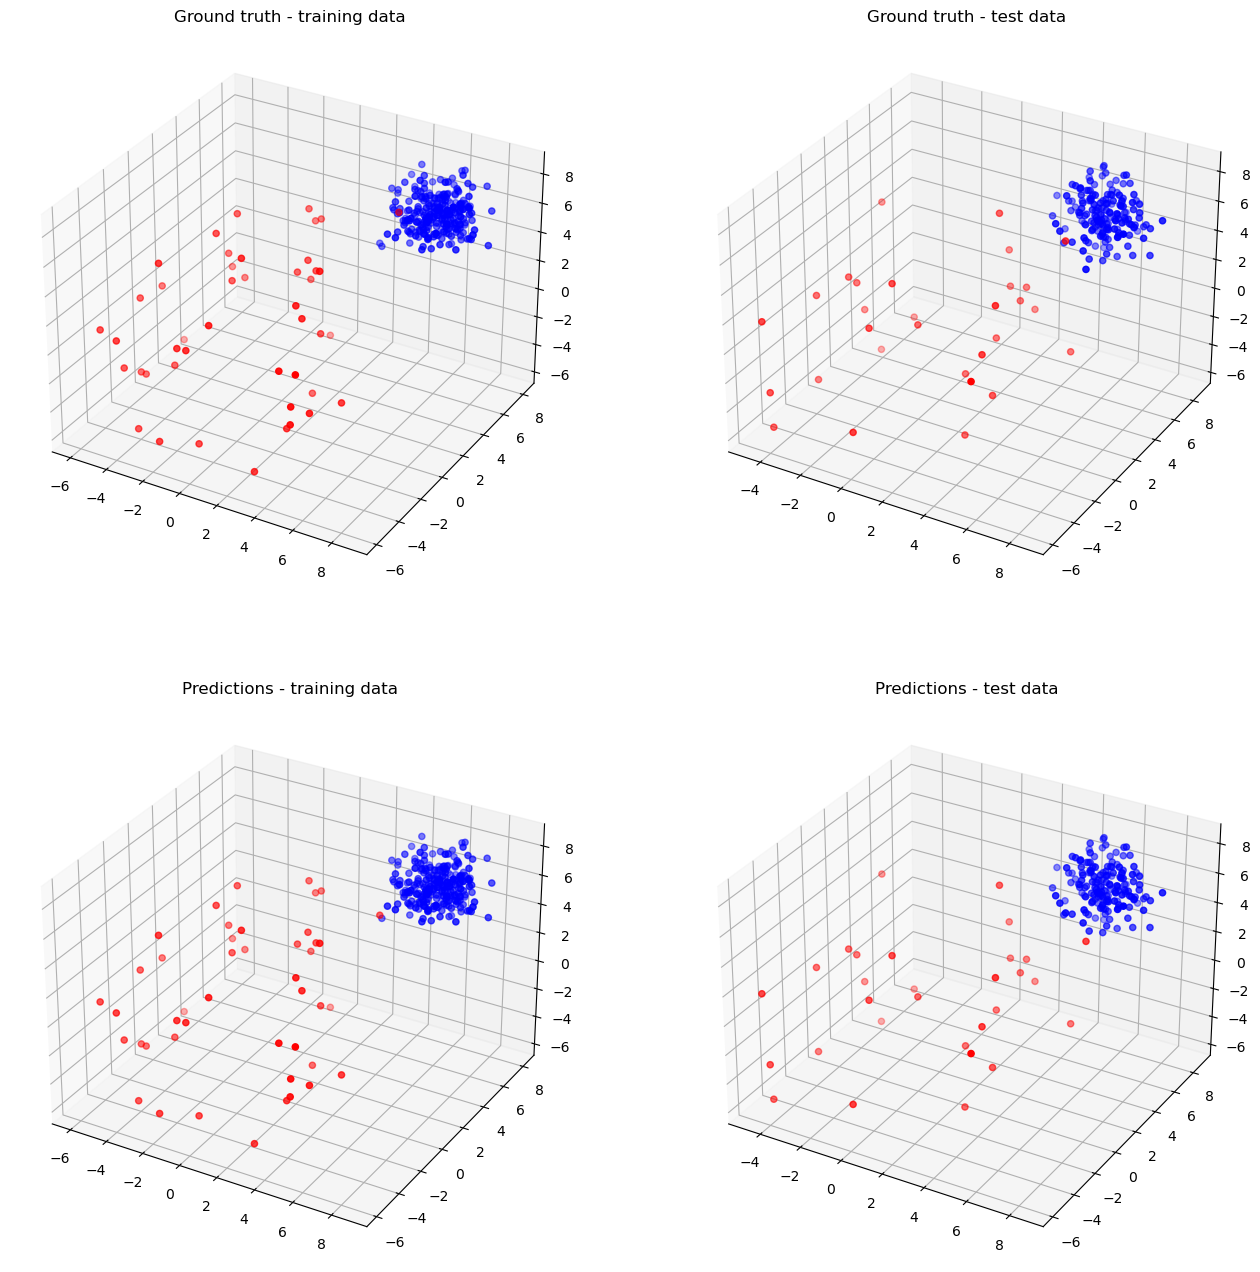

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(16,16), subplot_kw={'projection': '3d'})
ax1, ax2, ax3, ax4 = axes.ravel()

ax1.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], x_train[y_train == 0, 2], c='b')
ax1.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], x_train[y_train == 1, 2], c='r')
ax1.set_title("Ground truth - training data")

ax2.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], x_test[y_test == 0, 2], c='b')
ax2.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], x_test[y_test == 1, 2], c='r')
ax2.set_title("Ground truth - test data")

ax3.scatter(x_train[y_train_pred == 0, 0], x_train[y_train_pred == 0, 1], x_train[y_train_pred == 0, 2], c='b')
ax3.scatter(x_train[y_train_pred == 1, 0], x_train[y_train_pred == 1, 1], x_train[y_train_pred == 1, 2], c='r')
ax3.set_title("Predictions - training data")

ax4.scatter(x_test[y_test_pred == 0, 0], x_test[y_test_pred == 0, 1], x_test[y_test_pred == 0, 2], c='b')
ax4.scatter(x_test[y_test_pred == 1, 0], x_test[y_test_pred == 1, 1], x_test[y_test_pred == 1, 2], c='r')
ax4.set_title("Predictions - test data")

plt.show()

In [70]:
deep_svdd = DeepSVDD(n_features=3, contamination=0.15)
deep_svdd.fit(x_train)
y_test_pred = deep_svdd.predict(x_test)
y_train_pred = deep_svdd.predict(x_train)

BA = balanced_accuracy_score(y_test, y_test_pred)
ROC = roc_auc_score(y_test, y_test_pred)

print(BA)
print(ROC)

Epoch 1/100, Loss: 12.539927065372467
Epoch 2/100, Loss: 12.358560860157013
Epoch 3/100, Loss: 12.091897130012512
Epoch 4/100, Loss: 12.568381488323212
Epoch 5/100, Loss: 12.67979609966278
Epoch 6/100, Loss: 13.084957093000412
Epoch 7/100, Loss: 12.904540210962296
Epoch 8/100, Loss: 12.496424227952957
Epoch 9/100, Loss: 11.87670585513115
Epoch 10/100, Loss: 11.94751638174057
Epoch 11/100, Loss: 12.396800577640533
Epoch 12/100, Loss: 12.32987129688263
Epoch 13/100, Loss: 12.685450077056885
Epoch 14/100, Loss: 12.07800006866455
Epoch 15/100, Loss: 12.42890453338623
Epoch 16/100, Loss: 11.888948053121567
Epoch 17/100, Loss: 11.825965106487274
Epoch 18/100, Loss: 12.781906932592392
Epoch 19/100, Loss: 11.916397720575333
Epoch 20/100, Loss: 12.984928846359253
Epoch 21/100, Loss: 12.647038638591766
Epoch 22/100, Loss: 12.749805092811584
Epoch 23/100, Loss: 11.883792638778687
Epoch 24/100, Loss: 12.156091570854187
Epoch 25/100, Loss: 12.674197494983673
Epoch 26/100, Loss: 11.891753882169724
E

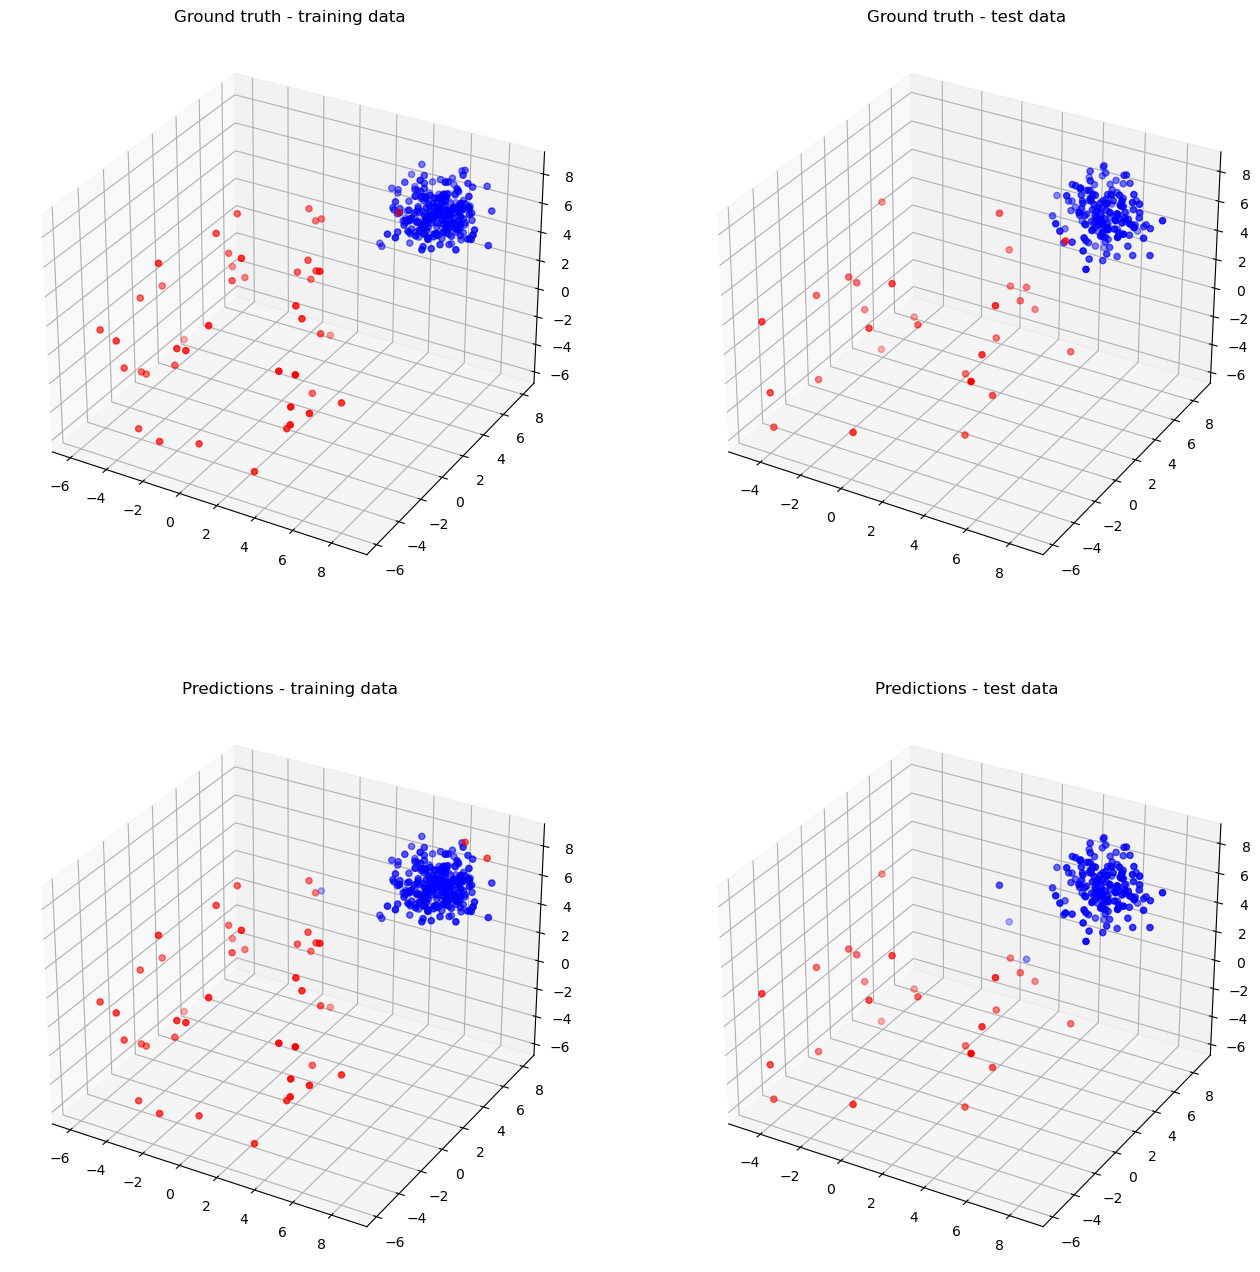

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(16,16), subplot_kw={'projection': '3d'})
ax1, ax2, ax3, ax4 = axes.ravel()

ax1.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], x_train[y_train == 0, 2], c='b')
ax1.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], x_train[y_train == 1, 2], c='r')
ax1.set_title("Ground truth - training data")

ax2.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], x_test[y_test == 0, 2], c='b')
ax2.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], x_test[y_test == 1, 2], c='r')
ax2.set_title("Ground truth - test data")

ax3.scatter(x_train[y_train_pred == 0, 0], x_train[y_train_pred == 0, 1], x_train[y_train_pred == 0, 2], c='b')
ax3.scatter(x_train[y_train_pred == 1, 0], x_train[y_train_pred == 1, 1], x_train[y_train_pred == 1, 2], c='r')
ax3.set_title("Predictions - training data")

ax4.scatter(x_test[y_test_pred == 0, 0], x_test[y_test_pred == 0, 1], x_test[y_test_pred == 0, 2], c='b')
ax4.scatter(x_test[y_test_pred == 1, 0], x_test[y_test_pred == 1, 1], x_test[y_test_pred == 1, 2], c='r')
ax4.set_title("Predictions - test data")

plt.show()

Ex2

In [171]:
data = loadmat("cardio.mat")
x = data['X'] 
y = data['y'].ravel()

y = -y * 2 + 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [173]:
param_grid = {
    "ocsvm__kernel": ["linear", "rbf", "poly"],
    "ocsvm__gamma": [0.001, 0.01, 0.1],
    "ocsvm__nu": [0.05, 0.1, 0.15]
}

In [175]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ocsvm", OneClassSVM())
])

In [177]:
balanced_acc_scorer = make_scorer(balanced_accuracy_score)

In [179]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=balanced_acc_scorer)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ocsvm', OneClassSVM())]),
             param_grid={'ocsvm__gamma': [0.001, 0.01, 0.1],
                         'ocsvm__kernel': ['linear', 'rbf', 'poly'],
                         'ocsvm__nu': [0.05, 0.1, 0.15]},
             scoring=make_scorer(balanced_accuracy_score))

In [184]:
best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

ba = balanced_accuracy_score(y_test, y_pred)
print(ba)

{'ocsvm__gamma': 0.001, 'ocsvm__kernel': 'rbf', 'ocsvm__nu': 0.15}
0.7835455538746008


Ex3

In [228]:
data = loadmat('shuttle.mat')
x = data['X']
y = data['y'].ravel() 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
x_train, x_test = standardizer(x_train, x_test)

In [230]:
ocsvm = OCSVM()
ocsvm.fit(x_train)
y_test_pred = ocsvm.predict(x_test)

In [231]:
ba_ocsvm = balanced_accuracy_score(y_test, y_test_pred)
roc_ocsvm = roc_auc_score(y_test, y_test_pred)

In [232]:
architectures = [[8,16,8], [16,32], [4,4,4], [16,8]]

In [235]:
for a in architectures:
    dsvdd = DeepSVDD(hidden_neurons=a, batch_size=100, n_features=9)
    dsvdd.fit(x_train)
    y_test_pred = dsvdd.predict(x_test)

    ba_dsvdd = balanced_accuracy_score(y_test, y_test_pred)
    roc_dsvdd = roc_auc_score(y_test, y_test_pred)

    print(f"Balanced accuracy: {ba_dsvdd}, ROC: {roc_dsvdd}, Architecture: {a}")

Epoch 1/100, Loss: 6.488566659390926
Epoch 2/100, Loss: 5.609340384602547
Epoch 3/100, Loss: 6.101066011469811
Epoch 4/100, Loss: 6.3625306356698275
Epoch 5/100, Loss: 6.2670092936605215
Epoch 6/100, Loss: 5.9015379142947495
Epoch 7/100, Loss: 5.264593779109418
Epoch 8/100, Loss: 6.882633897475898
Epoch 9/100, Loss: 6.692762543447316
Epoch 10/100, Loss: 7.011963530443609
Epoch 11/100, Loss: 6.391978076659143
Epoch 12/100, Loss: 7.324867533519864
Epoch 13/100, Loss: 7.065279791131616
Epoch 14/100, Loss: 5.035913335159421
Epoch 15/100, Loss: 6.5420079422183335
Epoch 16/100, Loss: 6.293247278314084
Epoch 17/100, Loss: 6.616290759295225
Epoch 18/100, Loss: 5.7839016523212194
Epoch 19/100, Loss: 5.488374058622867
Epoch 20/100, Loss: 7.0107359336689115
Epoch 21/100, Loss: 6.891536892391741
Epoch 22/100, Loss: 6.5020342892967165
Epoch 23/100, Loss: 4.880911339074373
Epoch 24/100, Loss: 7.160329231992364
Epoch 25/100, Loss: 6.601180580910295
Epoch 26/100, Loss: 6.9876783369109035
Epoch 27/100,